In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

# Load one training sample

In [2]:
train_path = "./../data/train/"
# The glob module finds all the pathnames matching a specified pattern
train_pkl_lst = glob(os.path.join(train_path, '*'))
with open(train_pkl_lst[0], 'rb') as f:
    training_sample = pickle.load(f)

In [3]:
# There are at most 60 agents/vehicles in a scene
# 'agent_id' is the track id for the agent to be predicted in this scene
training_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])

In [4]:
training_sample['agent_id']

'00000000-0000-0000-0000-000000044529'

In [8]:
print(training_sample['car_mask'])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [5]:
training_sample['p_in'].shape

(60, 19, 2)

In [6]:
training_sample['lane'].shape

(234, 2)

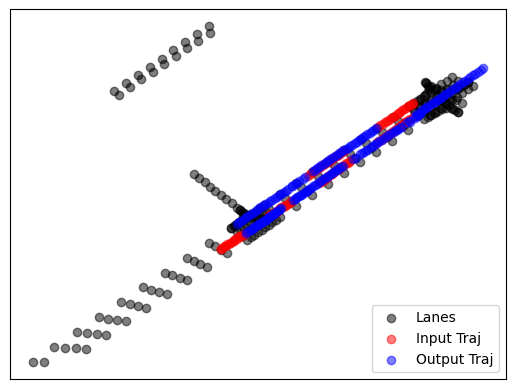

In [9]:
plt.scatter(training_sample['lane'][:,0], training_sample['lane'][:,1], alpha=0.5, label = "Lanes", color = "black")

plt.scatter(training_sample['p_in'][:6,:,0], training_sample['p_in'][:6,:,1], alpha=0.5, label = "Input Traj", color = "red")
plt.scatter(training_sample['p_out'][:6,:,0], training_sample['p_out'][:6,:,1], alpha=0.5, label = "Output Traj", color = "blue")

plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

# Examining the submission format

In [9]:
test_path ="./../data/val_in/"
test_pkl_list = glob(os.path.join(test_path, '*'))
test_pkl_list.sort()
with open(test_pkl_list[0], 'rb') as f:
    test_sample = pickle.load(f)

In [10]:
test_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'track_id'])

In [13]:
test_sample[0]['p_in'].shape

KeyError: 0

In [ ]:
# Submission Files: a sample submission file in the correct format
# 30-step ahead predictions of positions. 
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predictions = np.random.randn(3200, 60)

In [ ]:
sub_df = pd.DataFrame(np.c_[sample_sub["ID"], predictions], columns=[np.r_[["ID"], ["v" + str(i) for i in range(1,61)]]])
sub_df.to_csv('test_submission.csv', index=None)

RangeIndex(start=0, stop=3200, step=1)